In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/LengthOfStay.csv")

In [3]:
df.rename(columns={
    'eid': 'episode_id',
    'vdate': 'visit_date',
    'rcount': 'readmission_count',
    'gender': 'gender',
    'dialysisrenalendstage': 'dialysis_renal_endstage',
    'asthma': 'asthma',
    'irondef': 'iron_deficiency',
    'pneum': 'pneumonia',
    'substancedependence': 'substance_dependence',
    'psychologicaldisordermajor': 'psych_disorder_major',
    'depress': 'depression',
    'psychother': 'psychotherapy',
    'fibrosisandother': 'fibrosis_other',
    'malnutrition': 'malnutrition',
    'hemo': 'hemoglobin',
    'hematocrit': 'hematocrit',
    'neutrophils': 'neutrophils',
    'sodium': 'sodium',
    'glucose': 'glucose',
    'bloodureanitro': 'blood_urea_nitrogen',
    'creatinine': 'creatinine',
    'bmi': 'bmi',
    'pulse': 'pulse',
    'respiration': 'respiration',
    'secondarydiagnosisnonicd9': 'secondary_dx_nonicd9',
    'discharged': 'discharge_date',
    'facid': 'facility_id',
    'lengthofstay': 'length_of_stay'
}, inplace=True)


In [4]:
df.shape

(100000, 28)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   episode_id               100000 non-null  int64  
 1   visit_date               100000 non-null  object 
 2   readmission_count        100000 non-null  object 
 3   gender                   100000 non-null  object 
 4   dialysis_renal_endstage  100000 non-null  int64  
 5   asthma                   100000 non-null  int64  
 6   iron_deficiency          100000 non-null  int64  
 7   pneumonia                100000 non-null  int64  
 8   substance_dependence     100000 non-null  int64  
 9   psych_disorder_major     100000 non-null  int64  
 10  depression               100000 non-null  int64  
 11  psychotherapy            100000 non-null  int64  
 12  fibrosis_other           100000 non-null  int64  
 13  malnutrition             100000 non-null  int64  
 14  hemog

In [6]:
df.head()

,episode_id,visit_date,readmission_count,gender,dialysis_renal_endstage,asthma,iron_deficiency,pneumonia,substance_dependence,psych_disorder_major,...,glucose,blood_urea_nitrogen,creatinine,bmi,pulse,respiration,secondary_dx_nonicd9,discharge_date,facility_id,length_of_stay
0,1,8/29/2012,0,F,0,0,0,0,0,0,...,192.476918,12.0,1.390722,30.432418,96,6.5,4,9/1/2012,B,3
1,2,5/26/2012,5+,F,0,0,0,0,0,0,...,94.078507,8.0,0.943164,28.460516,61,6.5,1,6/2/2012,A,7
2,3,9/22/2012,1,F,0,0,0,0,0,0,...,130.530524,12.0,1.065750,28.843812,64,6.5,2,9/25/2012,B,3
3,4,8/9/2012,0,F,0,0,0,0,0,0,...,163.377028,12.0,0.906862,27.959007,76,6.5,1,8/10/2012,A,1
4,5,12/20/2012,0,F,0,0,0,1,0,1,...,94.886654,11.5,1.242854,30.258927,67,5.6,2,12/24/2012,E,4


# **Data Preproccessing**

In [7]:
df.isna().sum()

,0
episode_id,0
visit_date,0
readmission_count,0
gender,0
dialysis_renal_endstage,0
asthma,0
iron_deficiency,0
pneumonia,0
substance_dependence,0
psych_disorder_major,0


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
num_cols = df.select_dtypes(include=['number']).columns
num_cols

Index(['episode_id', 'dialysis_renal_endstage', 'asthma', 'iron_deficiency',
       'pneumonia', 'substance_dependence', 'psych_disorder_major',
       'depression', 'psychotherapy', 'fibrosis_other', 'malnutrition',
       'hemoglobin', 'hematocrit', 'neutrophils', 'sodium', 'glucose',
       'blood_urea_nitrogen', 'creatinine', 'bmi', 'pulse', 'respiration',
       'secondary_dx_nonicd9', 'length_of_stay'],
      dtype='object')

In [10]:
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols

Index(['visit_date', 'readmission_count', 'gender', 'discharge_date',
       'facility_id'],
      dtype='object')

In [11]:
df['visit_date']

,visit_date
0,8/29/2012
1,5/26/2012
2,9/22/2012
3,8/9/2012
4,12/20/2012
...,...
99995,1/28/2012
99996,8/6/2012
99997,7/23/2012
99998,12/19/2012


In [12]:
df['visit_date']=pd.to_datetime(df['visit_date'])

In [13]:
df['discharge_date']

,discharge_date
0,9/1/2012
1,6/2/2012
2,9/25/2012
3,8/10/2012
4,12/24/2012
...,...
99995,2/3/2012
99996,8/7/2012
99997,7/27/2012
99998,12/23/2012


In [14]:
df['discharge_date']=pd.to_datetime(df['discharge_date'])

In [15]:
df['readmission_count'].unique()

array(['0', '5+', '1', '3', '4', '2'], dtype=object)

In [16]:
df['readmission_count'].value_counts()

,count
readmission_count,
0,55031
1,15007
2,9987
3,8047
4,6941
5+,4987


In [17]:
df['readmission_count'].replace('5+', '5', inplace=True)

/tmp/ipython-input-3906430289.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['readmission_count'].replace('5+', '5', inplace=True)


In [18]:
df['readmission_count'].value_counts()

,count
readmission_count,
0,55031
1,15007
2,9987
3,8047
4,6941
5,4987


In [19]:
df['readmission_count'] = df['readmission_count'].astype('int')

In [20]:
df['gender'].unique()

array(['F', 'M'], dtype=object)

In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

In [22]:
df['facility_id'].value_counts()

,count
facility_id,
E,30755
A,30035
B,30012
C,4699
D,4499


In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['facility_id'] = le.fit_transform(df['facility_id'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   episode_id               100000 non-null  int64         
 1   visit_date               100000 non-null  datetime64[ns]
 2   readmission_count        100000 non-null  int64         
 3   gender                   100000 non-null  int64         
 4   dialysis_renal_endstage  100000 non-null  int64         
 5   asthma                   100000 non-null  int64         
 6   iron_deficiency          100000 non-null  int64         
 7   pneumonia                100000 non-null  int64         
 8   substance_dependence     100000 non-null  int64         
 9   psych_disorder_major     100000 non-null  int64         
 10  depression               100000 non-null  int64         
 11  psychotherapy            100000 non-null  int64         
 12  fibrosis_other   

In [25]:
len(df.columns)

28

# **Feature Engineering**

In [26]:
# extract parts from visit_date and discharge_date in one go
for col in ['visit_date', 'discharge_date']:
    df[f'{col}_year'] = df[col].dt.year
    df[f'{col}_month'] = df[col].dt.month
    df[f'{col}_day'] = df[col].dt.day
    df[f'{col}_weekday'] = df[col].dt.weekday

# drop original datetime columns
df.drop(['visit_date', 'discharge_date'], axis=1, inplace=True)


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 34 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   episode_id               100000 non-null  int64  
 1   readmission_count        100000 non-null  int64  
 2   gender                   100000 non-null  int64  
 3   dialysis_renal_endstage  100000 non-null  int64  
 4   asthma                   100000 non-null  int64  
 5   iron_deficiency          100000 non-null  int64  
 6   pneumonia                100000 non-null  int64  
 7   substance_dependence     100000 non-null  int64  
 8   psych_disorder_major     100000 non-null  int64  
 9   depression               100000 non-null  int64  
 10  psychotherapy            100000 non-null  int64  
 11  fibrosis_other           100000 non-null  int64  
 12  malnutrition             100000 non-null  int64  
 13  hemoglobin               100000 non-null  int64  
 14  hemat

## **Deeper EDA**

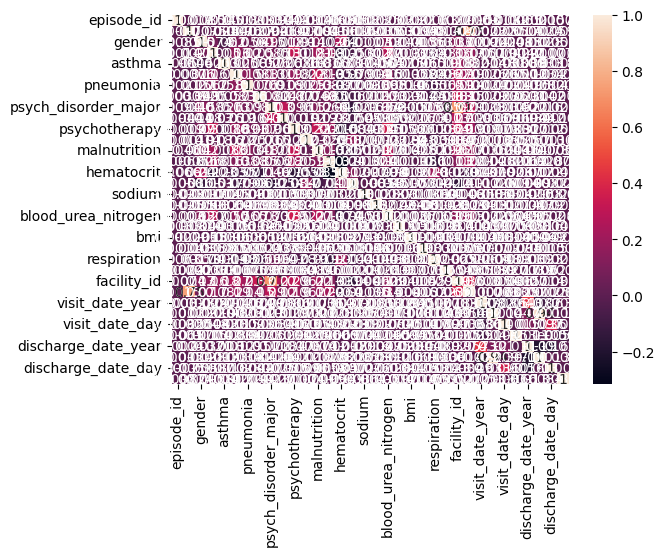

In [28]:
#heatmap
sns.heatmap(df.corr(), annot=True)
plt.show()

In [29]:
corr_with_target = df.corr()["length_of_stay"].sort_values(ascending=False)
corr_with_target

,length_of_stay
length_of_stay,1.000000
readmission_count,0.749514
facility_id,0.360356
psych_disorder_major,0.286724
hemoglobin,0.217696
iron_deficiency,0.193838
psychotherapy,0.191695
malnutrition,0.174397
dialysis_renal_endstage,0.169695
blood_urea_nitrogen,0.148290


In [30]:
len(corr_with_target)

34

as we can see the values are very close to zero, so non-linearly raleted

# **Feature Selection**

In [31]:
# column transform for eda
X = df.drop('length_of_stay', axis=1)
y = df['length_of_stay']

In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 33 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   episode_id               100000 non-null  int64  
 1   readmission_count        100000 non-null  int64  
 2   gender                   100000 non-null  int64  
 3   dialysis_renal_endstage  100000 non-null  int64  
 4   asthma                   100000 non-null  int64  
 5   iron_deficiency          100000 non-null  int64  
 6   pneumonia                100000 non-null  int64  
 7   substance_dependence     100000 non-null  int64  
 8   psych_disorder_major     100000 non-null  int64  
 9   depression               100000 non-null  int64  
 10  psychotherapy            100000 non-null  int64  
 11  fibrosis_other           100000 non-null  int64  
 12  malnutrition             100000 non-null  int64  
 13  hemoglobin               100000 non-null  int64  
 14  hemat

In [33]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = StandardScaler()

X_trans = scaler.fit_transform(X)
X_trans = pd.DataFrame(X_trans, columns=X.columns)

In [34]:
#let us use mutual information method
from sklearn.feature_selection import mutual_info_regression
mi = mutual_info_regression(X_trans, y)
mi = pd.Series(mi)
mi.index = X_trans.columns
mi.sort_values(ascending=False)

,0
readmission_count,0.508504
facility_id,0.154627
psych_disorder_major,0.106685
blood_urea_nitrogen,0.061126
hematocrit,0.055344
respiration,0.050182
neutrophils,0.045855
hemoglobin,0.037814
iron_deficiency,0.036769
substance_dependence,0.024353


In [35]:
X_drop_cols = [
    'secondary_dx_nonicd9',
    'episode_id',
    'visit_date_day', 'visit_date_weekday', 'visit_date_month', 'visit_date_year',
    'discharge_date_day', 'discharge_date_weekday', 'discharge_date_month', 'discharge_date_year',
    'bmi', 'glucose', 'sodium', 'creatinine', 'neutrophils', 'respiration', 'hematocrit',
    'fibrosis_other'
]

X.drop(columns=X_drop_cols, inplace=True)


In [36]:
len(X.columns)

15

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

X_vif = X.copy()  # temporary copy for VIF only
X_vif = sm.add_constant(X_vif)

vif = pd.DataFrame()
vif["Variable"] = X_vif.columns
vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif)

                   Variable        VIF
0                     const  43.946468
1         readmission_count   1.000190
2                    gender   1.057991
3   dialysis_renal_endstage   1.183765
4                    asthma   1.084178
5           iron_deficiency   1.185474
6                 pneumonia   1.079788
7      substance_dependence   1.212256
8      psych_disorder_major   2.375474
9                depression   1.119890
10            psychotherapy   1.386830
11             malnutrition   1.243220
12               hemoglobin   1.078457
13      blood_urea_nitrogen   1.219146
14                    pulse   1.000254
15              facility_id   3.133383


In [38]:
# splitting data into train dataset and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80000, 15)
(20000, 15)
(80000,)
(20000,)


In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Preprocessing
preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), X.columns.tolist())])

In [40]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

# **KNN ======================>**

In [41]:
# Pipeline
pipe = Pipeline(steps=[('preprocessor', preprocessor),('model', KNeighborsRegressor(n_neighbors=5))])
# Fit the pipeline
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['readmission_count',
                                                   'gender',
                                                   'dialysis_renal_endstage',
                                                   'asthma', 'iron_deficiency',
                                                   'pneumonia',
                                                   'substance_dependence',
                                                   'psych_disorder_major',
                                                   'depression',
                                                   'psychotherapy',
                                                   'malnutrition', 'hemoglobin',
                                                   'blood_urea_nitrogen',
                                                   'pulse', 'facility_id'])])),
                ('model', KNeighborsRegressor())])

In [42]:
# Predict
y_pred = pipe.predict(X_test)
# Metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2}")
print(f"RMSE: {rmse}")

R² Score: 0.7640540071867192
RMSE: 1.137840937917071


# **Decision Tree=======================>**

In [43]:
# Create pipeline
pipe = Pipeline(steps=[('preprocessor', preprocessor), ('model', DecisionTreeRegressor(random_state=42))])
# Fit
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['readmission_count',
                                                   'gender',
                                                   'dialysis_renal_endstage',
                                                   'asthma', 'iron_deficiency',
                                                   'pneumonia',
                                                   'substance_dependence',
                                                   'psych_disorder_major',
                                                   'depression',
                                                   'psychotherapy',
                                                   'malnutrition', 'hemoglobin',
                                                   'blood_urea_nitrogen',
                                                   'pulse', 'facility_id'])])),
                ('model', DecisionTreeRegressor(random_state=42))])

In [44]:
# Predict
y_pred = pipe.predict(X_test)
# Metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2}")
print(f"RMSE: {rmse}")

R² Score: 0.6922520276228581
RMSE: 1.2994897318015532


# **Random Forest =============================>**

In [45]:
# Create pipeline
pipe = Pipeline(steps=[('preprocessor', preprocessor), ('model', RandomForestRegressor(n_estimators=100, random_state=42))])
# Fit
pipe.fit(X_train, y_train)
# Predict
y_pred = pipe.predict(X_test)
# Metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2}")
print(f"RMSE: {rmse}")

R² Score: 0.7815259067840962
RMSE: 1.0949019388067731


ada boost

In [46]:
# Create pipeline
pipe = Pipeline(steps=[('preprocessor', preprocessor), ('model', AdaBoostRegressor(n_estimators=100, random_state=42))])
# Fit
pipe.fit(X_train, y_train)
# Predict
y_pred = pipe.predict(X_test)
# Metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2}")
print(f"RMSE: {rmse}")

R² Score: 0.13842661837798842
RMSE: 2.174309625917246


gradient boost

In [47]:
# Create pipeline
pipe = Pipeline(steps=[('preprocessor', preprocessor), ('model', GradientBoostingRegressor(n_estimators=100, random_state=42))])
# Fit
pipe.fit(X_train, y_train)
# Predict
y_pred = pipe.predict(X_test)
# Metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2}")
print(f"RMSE: {rmse}")

R² Score: 0.8071764909706434
RMSE: 1.0286206602304944


xg boost

In [48]:
# Create pipeline
pipe_xg = Pipeline(steps=[('preprocessor', preprocessor), ('model', XGBRegressor(n_estimators=100, random_state=42, eval_metric='rmse'))])
# Fit
pipe_xg.fit(X_train, y_train)
# Predict
y_pred = pipe_xg.predict(X_test)
# Metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2}")
print(f"RMSE: {rmse}")

R² Score: 0.8108892440795898
RMSE: 1.0186694950052844


linear regression

In [49]:
# Create pipeline
pipe = Pipeline(steps=[('preprocessor', preprocessor), ('model', LinearRegression())])
# Fit
pipe.fit(X_train, y_train)
# Predict
y_pred = pipe.predict(X_test)
# Metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2}")
print(f"RMSE: {rmse}")

R² Score: 0.7577228475271204
RMSE: 1.153005774672731


svr

In [50]:
# Create pipeline
pipe = Pipeline(steps=[('preprocessor', preprocessor), ('model', SVR())])
# Fit
pipe.fit(X_train, y_train)
# Predict
y_pred = pipe.predict(X_test)
# Metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2}")
print(f"RMSE: {rmse}")

================================================================

In [51]:
import pickle

with open("regression_model_rf.pkl", "wb") as f:
    pickle.dump(pipe_xg, f)